In [19]:
import cirq
import matplotlib.pyplot as plt

simulator = cirq.DensityMatrixSimulator()

def binary_labels(num_qubits):
    return [bin(x)[2:].zfill(num_qubits) for x in range(2 ** num_qubits)]

In [44]:
# Initialize qubits in superposition states

qubits = cirq.LineQubit.range(3)
circuit = cirq.Circuit()

circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.H(qubits[1]))
circuit.append(cirq.H(qubits[2]))

print(circuit)

0: ───H───

1: ───H───

2: ───H───


In [45]:
# Grovers Algorithm

## Apply the oracle
circuit.append([cirq.X(qubits[0]), cirq.H(qubits[2])], strategy=cirq.InsertStrategy.NEW_THEN_INLINE)
circuit.append(cirq.TOFFOLI(qubits[0], qubits[1], qubits[2]))
circuit.append([cirq.X(qubits[0]), cirq.H(qubits[2])], strategy=cirq.InsertStrategy.NEW_THEN_INLINE)

## Apply the Grovers Diffusion operator
circuit.append([cirq.H(qubits[0]), cirq.H(qubits[1]), cirq.H(qubits[2])], strategy=cirq.InsertStrategy.NEW_THEN_INLINE)
circuit.append([cirq.X(qubits[0]), cirq.X(qubits[1]), cirq.X(qubits[2])], strategy=cirq.InsertStrategy.NEW_THEN_INLINE)
circuit.append([cirq.H(qubits[2])], strategy=cirq.InsertStrategy.NEW_THEN_INLINE)
circuit.append(cirq.TOFFOLI(qubits[0], qubits[1], qubits[2]))
circuit.append([cirq.H(qubits[2])], strategy=cirq.InsertStrategy.NEW_THEN_INLINE)
circuit.append([cirq.X(qubits[0]), cirq.X(qubits[1]), cirq.X(qubits[2])], strategy=cirq.InsertStrategy.NEW_THEN_INLINE)
circuit.append([cirq.H(qubits[0]), cirq.H(qubits[1]), cirq.H(qubits[2])], strategy=cirq.InsertStrategy.NEW_THEN_INLINE)

print(circuit)


0: ───H───X───@───X───H───X───────@───────X───H───
              │                   │
1: ───H───────@───────H───X───────@───────X───H───
              │                   │
2: ───H───H───X───H───H───X───H───X───H───X───H───


In [46]:

circuit.append(cirq.measure(qubits[0]))
circuit.append(cirq.measure(qubits[1]))
circuit.append(cirq.measure(qubits[2]))

print(circuit)

0: ───H───X───@───X───H───X───────@───────X───H───M───
              │                   │
1: ───H───────@───────H───X───────@───────X───H───M───
              │                   │
2: ───H───H───X───H───H───X───H───X───H───X───H───M───


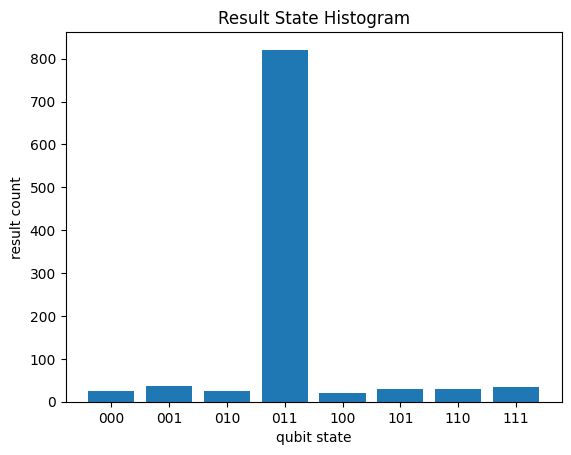

In [47]:
result = simulator.run(circuit, repetitions=1024)
_ = cirq.plot_state_histogram(result, plt.subplot(), tick_label=binary_labels(3))